## Input

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Morga\programsMG\TextMining\Tweets.csv')

In [2]:
# Dropping the row 
df.drop([314], inplace = True)

In [3]:
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


## Preprocessing

In [4]:
#seperating the label
y=df['sentiment'].values
M=df['text'].tolist()

In [5]:
import re
X1=[]
for item in M:
    X1.append(re.sub(r'([a-zA-Z0-9_<>-])\1+', r'\1\1', item))

In [6]:
tempX=[]
for item in X1:
    iteml=item.lower()
    item1=iteml.replace('2day ','today ')
    item2=item1.replace('2moro ','tomorrow ')
    item3=item2.replace('2morrow ','tomorrow ')
    item4=item3.replace('2night ','tonight ')
    item5=item4.replace('2nite ','tonight ')
    item6=item5.replace('b-day ','birthday ')
    item7=item6.replace('b4 ','before ')
    item8=item7.replace('bb ','be back ')
    item9=item8.replace('bbl ','be back later ')
    item10=item9.replace('bc ','because ')
    item11=item10.replace('bday ','birthday ')
    item12=item11.replace('belive ','believe ')
    item13=item12.replace('bf ','boyfriend ')
    item14=item13.replace('bff ','best freind forever ')
    item15=item14.replace('brb ','be right back ')
    item16=item15.replace('bros ','bro ')
    item17=item16.replace('bs ','bullshit ')
    item18=item17.replace('btw ','by the way ')
    item19=item18.replace('dat ','that ')
    item20=item19.replace('doc ','doctor ')
    item21=item20.replace('docs ','doctor ')
    item22=item21.replace('hott ','hot ')
    item23=item22.replace('fb ','facebook ')
    item24=item23.replace('jk ','just kidding ')
    item25=item24.replace('jst ','just ')
    item26=item25.replace(' ng ',' nice game ')
    item27=item26.replace('nt ','nice try ')
    item28=item27.replace('ok ','okay ')
    item29=item28.replace('okayy ','okay ')
    item30=item29.replace('omgg ','omg ')
    item31=item30.replace('ppl ','people ')
    item32=item31.replace('tonite ','tonight ')
    item33=item32.replace(' u ',' you ')
    item34=item33.replace('u2 ','you too ')
    item35=item34.replace('ugg ','ugh ')
    item36=item35.replace('uggh ','ugh ')
    item37=item36.replace('uh ','ugh ')
    item38=item37.replace('uhh ','ugh ')
    item39=item38.replace('umm ','um ')
    item40=item39.replace('ur ','your ')
    item41=item40.replace('waah ','waa ')
    item42=item41.replace('wah ','waa ')
    item43=item42.replace('waay ','waa ')
    item44=item43.replace('xoxo ','xo ')
    item45=item44.replace('xx ','xo ')
    item46=item45.replace(' y ',' why ')
    item47=item46.replace('whyy ','why ')
    item48=item47.replace('yaay ','ya ')
    item49=item48.replace('yah ','ya ')
    item50=item49.replace('juss ','just ')
    item51=item50.replace('whassqoodd ','whats good') 
    item52=item51.replace('soo ','so ')
    tempX.append(item52)

In [7]:
# import TweetTokenizer() method from nltk
from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer()

In [8]:
# create a function for the tweet tokenizer from NLTK
def tok(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

In [9]:
#selecting the stop words
stopwords =['!','#','$','%','&',"'",'*','(',')','+', ',','-','.','/',':',';','<','=','>'
              ,'?','@','[','\\',']','^','_','`','{','|','}','~','¿','#bgt','#fail','#fb'
              ,'#ff','#followfriday','#hhrs','#judday','#sanctuarysunday','#starwarsday'
              ,'#twpp','>','_','_127','__','_b','_benson','_c','_carter','_d','_guy','_henrie'
              ,'_j','_m','_marie','_skies','_x','_xo']


In [10]:
# creating a function for the pipeline to remove stop words
def remove_stop(tokens):
    return [t for t in tokens if t not in stopwords]

In [11]:
# creating a function to use each function from the pipeline on the texts
def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens     

In [12]:
# selecting the functions for the pipeline
pipeline = [tok,remove_stop,]
# using the pipelined list of functions.
Xtemp=[]
for tweet in tempX:
    Xtemp.append(prepare(tweet,pipeline))

In [13]:
#creating a new list
X=[]
#joining the lists of lists
#so a list of stirngs remains
for tweet in Xtemp:
    X.append(' '.join(tweet))

## New feature set vectorization and df creation

In [14]:
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

stemmer = PorterStemmer()
analyzer = TfidfVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

In [15]:
# import the LinearSVC module
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
# Best vectorization options for SVM
unigram_tfidf_vectorizer_Tweet_toke_no_stop_stem = TfidfVectorizer(encoding='latin-1'
                                                                   , use_idf=True
                                                                   , min_df=5
                                                                   ,tokenizer=tok
                                                                   ,analyzer=stemmed_words)
# Best vectorization options for MNB
ngram_tfidf_vectorizer_Tweet_toke_no_stop_ngram = TfidfVectorizer(encoding='latin-1'
                                                                  , ngram_range=(1,2)
                                                                  , use_idf=True
                                                                  , min_df=5
                                                                  , tokenizer=tok)
#vectorizing 
vecs = unigram_tfidf_vectorizer_Tweet_toke_no_stop_stem.fit_transform(X)
# adding the vectors created into a data frame
vecsdf=pd.DataFrame(vecs.toarray(),
            columns=unigram_tfidf_vectorizer_Tweet_toke_no_stop_stem.get_feature_names_out())
#vectorizing 
vecs2 = ngram_tfidf_vectorizer_Tweet_toke_no_stop_ngram.fit_transform(X)
# adding the vectors created into a data frame
vecs2df=pd.DataFrame(vecs2.toarray(),
            columns=ngram_tfidf_vectorizer_Tweet_toke_no_stop_ngram.get_feature_names_out())

In [16]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
svm8 = LinearSVC(C=1)
mnb8= MultinomialNB()

In [17]:
#creating empty dict to add the accuracys into
svm_fs_accurracy={}
mnb_fs_accurracy={}

In [18]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
svm8 = LinearSVC(C=1)
mnb8= MultinomialNB()
import numpy as np
#train model
#svm_model_http = svm8.fit(vecs2df,y)
#cross validation score
svm_cv_scores = cross_val_score(svm8, vecsdf, y, cv=10)
mnb_cv_scores = cross_val_score(mnb8, vecsdf, y, cv=10)
#finding the overall average accuracy.
svm_cv_score = np.mean(svm_cv_scores)
mnb_cv_score = np.mean(mnb_cv_scores)
svm_fs_accurracy['Original svm Accuracy']=svm_cv_score
mnb_fs_accurracy['Original mnb Accuracy']=mnb_cv_score

## new feature creation HTTP

In [19]:
toktext=[]
for item in Xtemp:
    toktext.append(item)

In [20]:
print(len(X))
print(len(toktext))

27480
27480


In [21]:
http_count = []
for item in toktext:
    for word in item:
        count=0
        if word.startswith('http'):
            count = count+1
        else:
            continue
    http_count.append(count)

In [22]:
len(http_count)

27480

In [23]:
vecsdf['http_count']=http_count

In [24]:
vecs2df['http_count']=http_count

In [25]:
svm9 = LinearSVC(C=1)
mnb9= MultinomialNB()

In [26]:
svm9 = LinearSVC(C=1)
mnb9= MultinomialNB()
#train model
#svm_model_http = svm9.fit(vecs2df,y)
#cross validation score
svm_cv_scores_http = cross_val_score(svm9, vecsdf, y, cv=10)
mnb_cv_scores_http = cross_val_score(mnb9, vecs2df, y, cv=10)
#finding the overall average accuracy.
svm_cv_score_http = np.mean(svm_cv_scores_http)
mnb_cv_score_http = np.mean(mnb_cv_scores_http)
svm_fs_accurracy['HTTP Count svm Accuracy']=svm_cv_score_http
mnb_fs_accurracy['HTTP Count mnb Accuracy']=mnb_cv_score_http

In [27]:
vecsdf.drop('http_count',axis=1,inplace=True)
vecs2df.drop('http_count',axis=1,inplace=True)

## new feature creation Emoticons

In [28]:
d_count = []
for item in Xtemp:
    for token in item:
        count=0
        if token.startswith(':-d'):
            count = count+1
        else:
            continue
    d_count.append(count)

In [29]:
len(d_count)

27480

In [30]:
p_count = []
for item in Xtemp:
    for token in item:
        count=0
        if token.startswith(':-p'):
            count = count+1
        else:
            continue
    p_count.append(count)

In [31]:
len(p_count)

27480

In [32]:
frown_count = []
for item in Xtemp:
    for token in item:
        count=0
        if token.startswith(':/'):
            count = count+1
        else:
            continue
    frown_count.append(count)

In [33]:
len(frown_count)

27480

In [34]:
suprise_count = []
for item in Xtemp:
    for token in item:
        count=0
        if token.startswith(':@'):
            count = count+1
        else:
            continue
    suprise_count.append(count)

In [35]:
len(suprise_count)

27480

In [36]:
frown2_count = []
for item in Xtemp:
    for token in item:
        count=0
        if token.startswith(':['):
            count = count+1
        else:
            continue
    frown2_count.append(count)

In [37]:
len(frown2_count)

27480

In [38]:
smile_count = []
for item in Xtemp:
    for token in item:
        count=0
        if token.startswith(':]'):
            count = count+1
        else:
            continue
    smile_count.append(count)

In [39]:
len(smile_count)

27480

In [40]:
toungenonose_count = []
for item in Xtemp:
    for token in item:
        count=0
        if token.startswith(':p'):
            count = count+1
        else:
            continue
    toungenonose_count.append(count)

In [41]:
len(toungenonose_count)

27480

In [42]:
straight_count = []
for item in Xtemp:
    for token in item:
        count=0
        if token.startswith(':|'):
            count = count+1
        else:
            continue
    straight_count.append(count)

In [43]:
len(straight_count)

27480

In [44]:
winknonose_count = []
for item in Xtemp:
    for token in item:
        count=0
        if token.startswith(';)'):
            count = count+1
        else:
            continue
    winknonose_count.append(count)

In [45]:
len(winknonose_count)

27480

In [46]:
wink_count = []
for item in Xtemp:
    for token in item:
        count=0
        if token.startswith(';-)'):
            count = count+1
        else:
            continue
    wink_count.append(count)

In [47]:
len(wink_count)

27480

In [48]:
winktounge_count = []
for item in Xtemp:
    for token in item:
        count=0
        if token.startswith(';d'):
            count = count+1
        else:
            continue
    winktounge_count.append(count)

In [49]:
len(winktounge_count)

27480

In [50]:
winkbackwardstounge_count = []
for item in Xtemp:
    for token in item:
        count=0
        if token.startswith(';p'):
            count = count+1
        else:
            continue
    winkbackwardstounge_count.append(count)

In [51]:
len(winkbackwardstounge_count)

27480

In [52]:
bigfrown_count = []
for item in Xtemp:
    for token in item:
        count=0
        if token.startswith('=('):
            count = count+1
        else:
            continue
    bigfrown_count.append(count)

In [53]:
len(bigfrown_count)

27480

In [54]:
smallfrown_count = []
for item in Xtemp:
    for token in item:
        count=0
        if token.startswith('=/'):
            count = count+1
        else:
            continue
    smallfrown_count.append(count)

In [55]:
len(smallfrown_count)

27480

In [56]:
bigsmile_count = []
for item in Xtemp:
    for token in item:
        count=0
        if token.startswith('=]'):
            count = count+1
        else:
            continue
    bigsmile_count.append(count)

In [57]:
len(bigsmile_count)

27480

In [58]:
bigeyetoungeout_count = []
for item in Xtemp:
    for token in item:
        count=0
        if token.startswith('=d'):
            count = count+1
        else:
            continue
    bigeyetoungeout_count.append(count)

In [59]:
len(bigeyetoungeout_count)

27480

In [60]:
bigeyebackwardstoungeout_count = []
for item in Xtemp:
    for token in item:
        count=0
        if token.startswith('=p'):
            count = count+1
        else:
            continue
    bigeyebackwardstoungeout_count.append(count)

In [61]:
len(bigeyebackwardstoungeout_count)

27480

In [62]:
vecsdf['d_count']=d_count
vecsdf['p_count']=p_count
vecsdf['frown_count']=frown_count
vecsdf['suprise_count']=suprise_count
vecsdf['frown2_count']=frown2_count
vecsdf['smile_count']=smile_count
vecsdf['toungenonose_count']=toungenonose_count
vecsdf['straight_count']=straight_count
vecsdf['winknonose_count']=winknonose_count
vecsdf['winktounge_count']=winktounge_count
vecsdf['winkbackwardstounge_count']=winkbackwardstounge_count
vecsdf['bigfrown_count']=bigfrown_count
vecsdf['smallfrown_count']=smallfrown_count
vecsdf['bigsmile_count']=bigsmile_count
vecsdf['bigeyetoungeout_count']=bigeyetoungeout_count
vecsdf['bigeyebackwardstoungeout_count']=bigeyebackwardstoungeout_count

In [63]:
vecs2df['d_count']=d_count
vecs2df['p_count']=p_count
vecs2df['frown_count']=frown_count
vecs2df['suprise_count']=suprise_count
vecs2df['frown2_count']=frown2_count
vecs2df['smile_count']=smile_count
vecs2df['toungenonose_count']=toungenonose_count
vecs2df['straight_count']=straight_count
vecs2df['winknonose_count']=winknonose_count
vecs2df['winktounge_count']=winktounge_count
vecs2df['winkbackwardstounge_count']=winkbackwardstounge_count
vecs2df['bigfrown_count']=bigfrown_count
vecs2df['smallfrown_count']=smallfrown_count
vecs2df['bigsmile_count']=bigsmile_count
vecs2df['bigeyetoungeout_count']=bigeyetoungeout_count
vecs2df['bigeyebackwardstoungeout_count']=bigeyebackwardstoungeout_count

In [64]:
svm10 = LinearSVC(C=1)
mnb10 = MultinomialNB()

In [65]:
#train model
#svm_model_http = svm9.fit(vecs2df,y)
#cross validation score
svm_cv_scores_emo = cross_val_score(svm10, vecsdf, y, cv=10)
mnb_cv_scores_emo = cross_val_score(mnb10, vecs2df, y, cv=10)
#finding the overall average accuracy.
svm_cv_score_emo = np.mean(svm_cv_scores_emo)
mnb_cv_score_emo = np.mean(mnb_cv_scores_emo)
svm_fs_accurracy['Emo Count svm Accuracy']=svm_cv_score_emo
mnb_fs_accurracy['Emo Count mnb Accuracy']=mnb_cv_score_emo

In [66]:
vecsdf

,00,04,05,06,07,08,09,10,100,101,...,toungenonose_count,straight_count,winknonose_count,winktounge_count,winkbackwardstounge_count,bigfrown_count,smallfrown_count,bigsmile_count,bigeyetoungeout_count,bigeyebackwardstoungeout_count
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
27476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
27477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
27478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
vecsdf.drop('d_count',axis=1,inplace=True)
vecsdf.drop('p_count',axis=1,inplace=True)
vecsdf.drop('frown_count',axis=1,inplace=True)
vecsdf.drop('suprise_count',axis=1,inplace=True)
vecsdf.drop('frown2_count',axis=1,inplace=True)
vecsdf.drop('smile_count',axis=1,inplace=True)
vecsdf.drop('toungenonose_count',axis=1,inplace=True)
vecsdf.drop('straight_count',axis=1,inplace=True)
vecsdf.drop('winknonose_count',axis=1,inplace=True)
vecsdf.drop('winktounge_count',axis=1,inplace=True)
vecsdf.drop('winkbackwardstounge_count',axis=1,inplace=True)
vecsdf.drop('bigfrown_count',axis=1,inplace=True)
vecsdf.drop('smallfrown_count',axis=1,inplace=True)
vecsdf.drop('bigsmile_count',axis=1,inplace=True)
vecsdf.drop('bigeyetoungeout_count',axis=1,inplace=True)
vecsdf.drop('bigeyebackwardstoungeout_count',axis=1,inplace=True)

In [68]:
vecs2df.drop('d_count',axis=1,inplace=True)
vecs2df.drop('p_count',axis=1,inplace=True)
vecs2df.drop('frown_count',axis=1,inplace=True)
vecs2df.drop('suprise_count',axis=1,inplace=True)
vecs2df.drop('frown2_count',axis=1,inplace=True)
vecs2df.drop('smile_count',axis=1,inplace=True)
vecs2df.drop('toungenonose_count',axis=1,inplace=True)
vecs2df.drop('straight_count',axis=1,inplace=True)
vecs2df.drop('winknonose_count',axis=1,inplace=True)
vecs2df.drop('winktounge_count',axis=1,inplace=True)
vecs2df.drop('winkbackwardstounge_count',axis=1,inplace=True)
vecs2df.drop('bigfrown_count',axis=1,inplace=True)
vecs2df.drop('smallfrown_count',axis=1,inplace=True)
vecs2df.drop('bigsmile_count',axis=1,inplace=True)
vecs2df.drop('bigeyetoungeout_count',axis=1,inplace=True)
vecs2df.drop('bigeyebackwardstoungeout_count',axis=1,inplace=True)

## Sentences count

In [69]:
from nltk import sent_tokenize
sentences=[]
for tweet in tempX:
    sentences.append(sent_tokenize(tweet))

In [70]:
sentences_count =[]
for tweet in sentences:
    count =0
    for sent in tweet:
        count=count+1
    sentences_count.append(count)

In [71]:
sentences_array = np.asarray(sentences_count)
sentences_norm = (sentences_array - sentences_array.min())/ (sentences_array.max() - sentences_array.min())

In [72]:
vecsdf['sentences_norm']=sentences_norm
vecs2df['sentences_norm']=sentences_norm

In [73]:
svm11 = LinearSVC(C=1)
mnb11 = MultinomialNB()
#train model
#svm_model_http = svm9.fit(vecs2df,y)
#cross validation score
svm_cv_scores_sent = cross_val_score(svm11, vecsdf, y, cv=10)
mnb_cv_scores_sent = cross_val_score(mnb11, vecs2df, y, cv=10)
#finding the overall average accuracy.
svm_cv_score_sent = np.mean(svm_cv_scores_sent)
mnb_cv_score_sent = np.mean(mnb_cv_scores_sent)
#print('sent svm Accuracy:',svm_cv_score_sent)
svm_fs_accurracy['Sent svm Accuracy']=svm_cv_score_sent
mnb_fs_accurracy['Sent mnb Accuracy']=mnb_cv_score_sent

In [74]:
vecsdf.drop('sentences_norm',axis=1,inplace=True)
vecs2df.drop('sentences_norm',axis=1,inplace=True)

## word count

In [75]:
words=[]
for tweet in Xtemp:
    words.append(tweet)

In [76]:
word_count =[]
for tweet in words:
    count =0
    for word in tweet:
        count=count+1
    word_count.append(count)

In [77]:
word_array = np.asarray(word_count)
word_norm = (word_array - word_array.min())/ (word_array.max() - word_array.min())

In [78]:
vecsdf['word_norm']=word_norm
vecs2df['word_norm']=word_norm

In [79]:
svm12 = LinearSVC(C=1)
mnb12 = MultinomialNB()
#train model
#svm_model_http = svm9.fit(vecs2df,y)
#cross validation score
svm_cv_scores_word = cross_val_score(svm12, vecsdf, y, cv=10)
mnb_cv_scores_word = cross_val_score(mnb12, vecs2df, y, cv=10)
#finding the overall average accuracy.
svm_cv_score_word = np.mean(svm_cv_scores_word)
mnb_cv_score_word = np.mean(mnb_cv_scores_word)
svm_fs_accurracy['Word svm Accuracy']=svm_cv_score_word
mnb_fs_accurracy['Word mnb Accuracy']=mnb_cv_score_word

In [80]:
vecsdf.drop('word_norm',axis=1,inplace=True)
vecs2df.drop('word_norm',axis=1,inplace=True)

## Negation

In [81]:
import re
def has_negation(post):
    pattern_neg_1 = re.compile(r'\b(not|no|never)\b')
    pattern_neg_2 = re.compile(r'\b([a-z]+less)\b')
    if pattern_neg_1.search(post.lower()) or pattern_neg_2.search(post.lower()):
        return 1
    else: 
        return 0

In [82]:
neg_count=[]
for item in X:
    neg_count.append(has_negation(item))

In [83]:
neg_array = np.asarray(neg_count)
neg_norm = (neg_array - neg_array.min())/ (neg_array.max() - neg_array.min())

In [84]:
vecsdf['neg_norm']=neg_norm
vecs2df['neg_norm']=neg_norm

In [85]:
svm13 = LinearSVC(C=1)
mnb13 = MultinomialNB()
#train model
#svm_model_http = svm9.fit(vecs2df,y)
#cross validation score
svm_cv_scores_neg = cross_val_score(svm13, vecsdf, y, cv=10)
mnb_cv_scores_neg = cross_val_score(mnb13, vecs2df, y, cv=10)
#finding the overall average accuracy.
svm_cv_score_neg = np.mean(svm_cv_scores_neg)
mnb_cv_score_neg = np.mean(mnb_cv_scores_neg)
#print('sent svm Accuracy:',svm_cv_score_sent)
svm_fs_accurracy['Neg svm Accuracy']=svm_cv_score_neg
mnb_fs_accurracy['Neg mnb Accuracy']=mnb_cv_score_neg

In [86]:
vecsdf.drop('neg_norm',axis=1,inplace=True)
vecs2df.drop('neg_norm',axis=1,inplace=True)

In [87]:
for key,value in mnb_fs_accurracy.items():
    print(key,':',value)

Original mnb Accuracy : 0.6409752547307133
HTTP Count mnb Accuracy : 0.652037845705968
Emo Count mnb Accuracy : 0.6524381368267831
Sent mnb Accuracy : 0.6526564774381367
Word mnb Accuracy : 0.6524381368267831
Neg mnb Accuracy : 0.6537117903930131


In [88]:
for key,value in svm_fs_accurracy.items():
    print(key,':',value)

Original svm Accuracy : 0.6930494905385736
HTTP Count svm Accuracy : 0.693122270742358
Emo Count svm Accuracy : 0.6940320232896653
Sent svm Accuracy : 0.6925400291120816
Word svm Accuracy : 0.6940320232896652
Neg svm Accuracy : 0.6946506550218341


## adding best 2 feature sets

In [89]:
vecs2df['word_norm']=word_norm
vecs2df['neg_norm']=neg_norm

In [90]:
vecsdf['neg_norm']=neg_norm
vecsdf['word_norm']=word_norm

In [91]:
svm14 = LinearSVC(C=1)
mnb14 = MultinomialNB()
#train model
#svm_model_http = svm9.fit(vecs2df,y)
#cross validation score
svm_cv_scores_final = cross_val_score(svm14, vecsdf, y, cv=10)
mnb_cv_scores_final = cross_val_score(mnb14, vecs2df, y, cv=10)
#finding the overall average accuracy.
svm_cv_score_final = np.mean(svm_cv_scores_final)
mnb_cv_score_final = np.mean(mnb_cv_scores_final)
#print('sent svm Accuracy:',svm_cv_score_sent)
svm_fs_accurracy['Final svm Accuracy']=svm_cv_score_final
mnb_fs_accurracy['Final mnb Accuracy']=mnb_cv_score_final

In [92]:
for key,value in mnb_fs_accurracy.items():
    print(key,':',value)

Original mnb Accuracy : 0.6409752547307133
HTTP Count mnb Accuracy : 0.652037845705968
Emo Count mnb Accuracy : 0.6524381368267831
Sent mnb Accuracy : 0.6526564774381367
Word mnb Accuracy : 0.6524381368267831
Neg mnb Accuracy : 0.6537117903930131
Final mnb Accuracy : 0.6528384279475983


In [93]:
for key,value in svm_fs_accurracy.items():
    print(key,':',value)

Original svm Accuracy : 0.6930494905385736
HTTP Count svm Accuracy : 0.693122270742358
Emo Count svm Accuracy : 0.6940320232896653
Sent svm Accuracy : 0.6925400291120816
Word svm Accuracy : 0.6940320232896652
Neg svm Accuracy : 0.6946506550218341
Final svm Accuracy : 0.6955240174672489


## Graphing

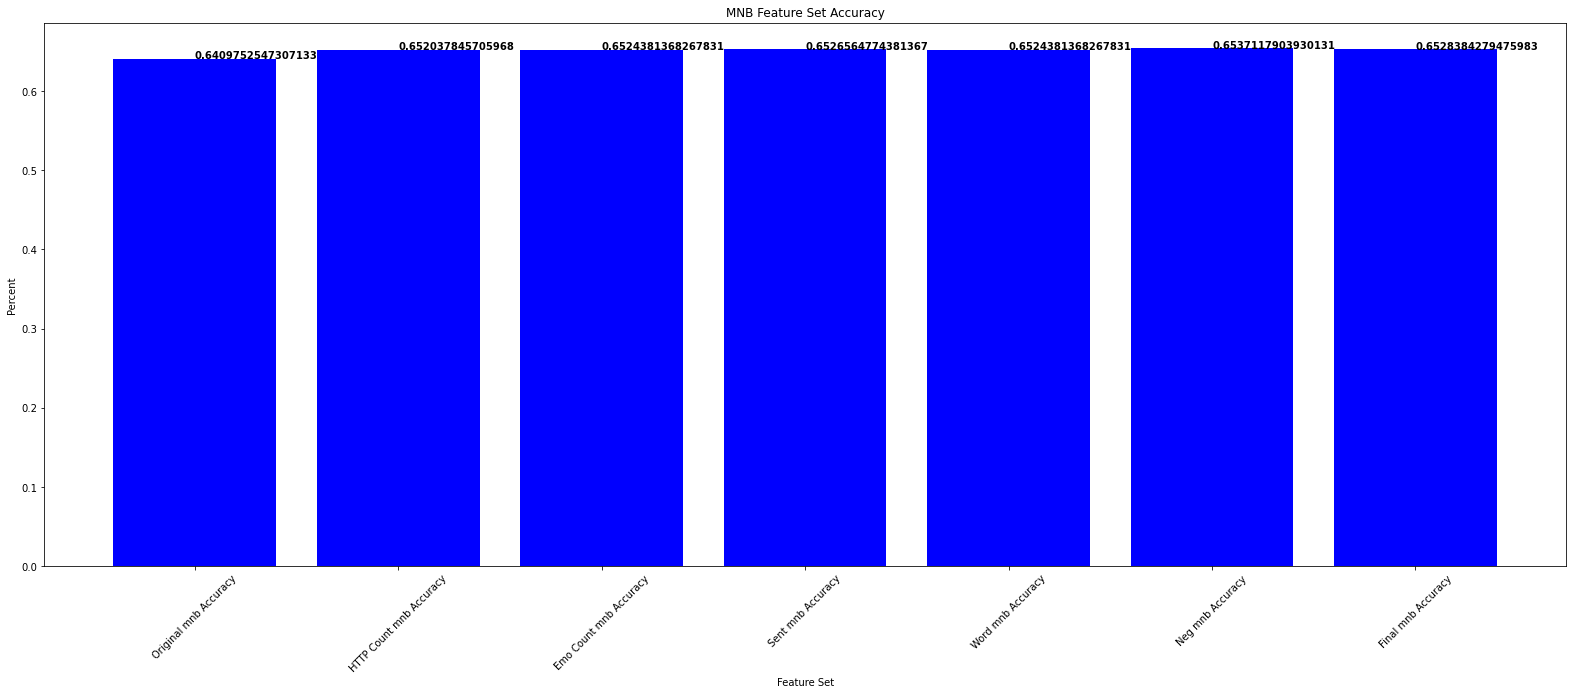

In [95]:
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold')


values = list(mnb_fs_accurracy.values())
names = list(mnb_fs_accurracy.keys())
colors = ['blue','blue','blue','blue','blue','blue','blue','blue'
         
]
plt.figure(figsize=(60, 10))

plt.subplot(121)
plt.bar(names
        ,values
        ,color= colors
       )

plt.xticks(rotation= 45)
plt.ylabel('Percent')
plt.xlabel('Feature Set')
plt.title('MNB Feature Set Accuracy')

addlabels(values)
plt.show()

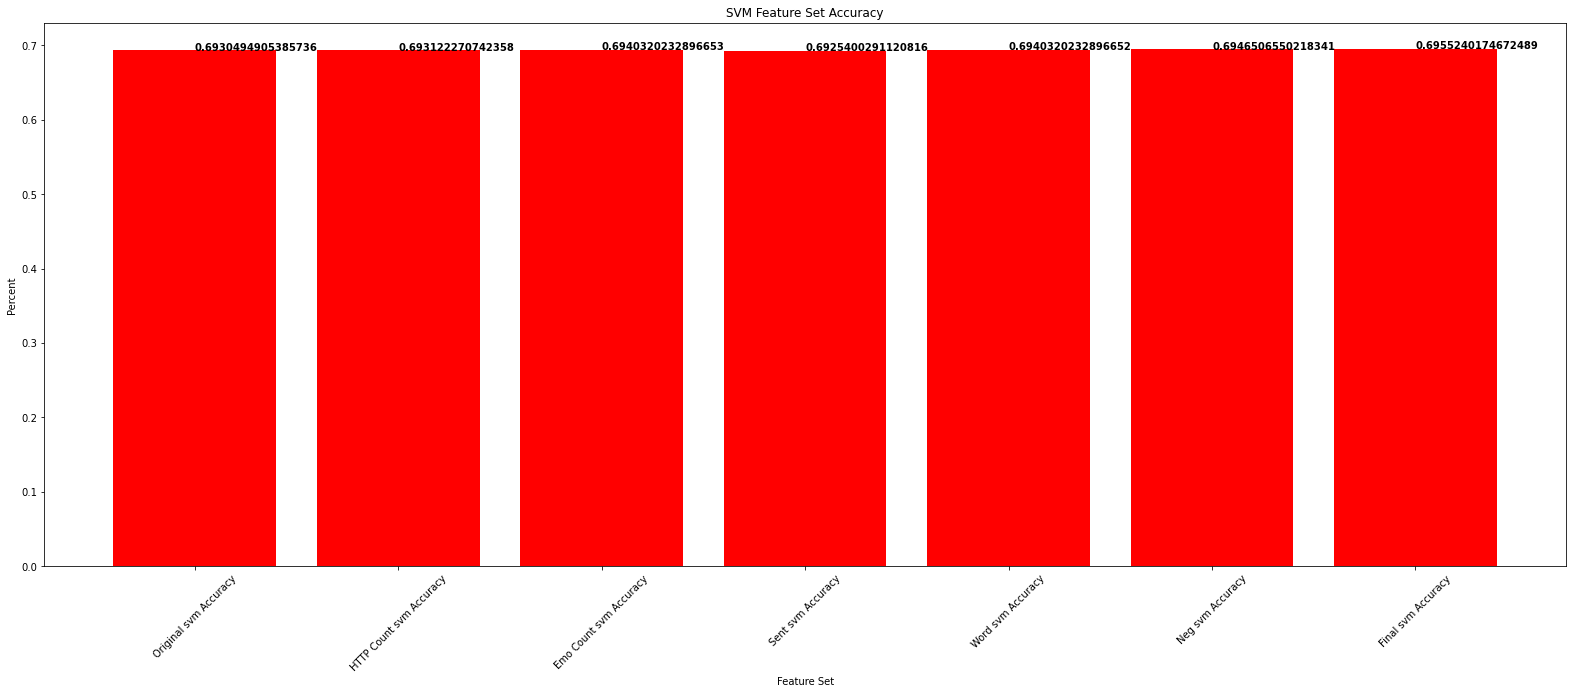

In [97]:
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(y):
    for i in range(len(y)):
        plt.text(i,y[i],y[i],fontweight = 'bold')


values = list(svm_fs_accurracy.values())
names = list(svm_fs_accurracy.keys())
colors = ['red','red','red','red','red','red','red','red'
         
]
plt.figure(figsize=(60, 10))

plt.subplot(121)
plt.bar(names
        ,values
        ,color= colors
       )

plt.xticks(rotation= 45)
plt.ylabel('Percent')
plt.xlabel('Feature Set')
plt.title('SVM Feature Set Accuracy')

addlabels(values)
plt.show()